In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [8]:
from amazon_reviews import get_dataset_word2vec
from cbow import CBOW
from amazon_reviews import get_most_similar_words
from sklearn.manifold import TSNE
from amazon_reviews import find_unique_word_counts
from amazon_reviews import make_word2ind_mapping, make_ind2word_mapping
from sklearn.cluster import KMeans
from collections import defaultdict

In [3]:
targets_int, contexts_int, vocab, corpus = get_dataset_word2vec(N_reviews=40000, corpus_return=True)
word2ind = make_word2ind_mapping(vocab)
ind2word = make_ind2word_mapping(vocab)
print(f'Number of target words in actual Amazon corpus: {len(targets_int)}. There should be 5434338.')
print(f'Number of context words in actual Amazon corpus: {len(contexts_int)}. There should be 5434338.')
print(f'Vocab size in actual Amazon corpus: {len(vocab)}. It should be 21905.')

Number of target words in actual Amazon corpus: 5434338. There should be 5434338.
Number of context words in actual Amazon corpus: 5434338. There should be 5434338.
Vocab size in actual Amazon corpus: 21905. It should be 21905.


In [6]:
# LOAD IN SAVED EMBEDDINGS
embeddings = np.load('export/embeddings.npz')
embeddings = embeddings['embeddings']

tsne = TSNE(n_components=2)
word_tsne = tsne.fit_transform(embeddings)
print(embeddings.shape)
print(word_tsne.shape)

(21905, 96)
(21905, 2)


## 3D TSNE

In [7]:
# RUNNN TSNE to give three dimensions!!
tsne_3d = TSNE(n_components=3)
word_tsne_3d = tsne_3d.fit_transform(embeddings)

In [16]:
# k=10
k = 10

#3d now
kmeans_3d = KMeans(n_clusters=k, random_state=0, n_init=10)
labels_3d = kmeans_3d.fit_predict(word_tsne_3d)

from collections import defaultdict
clusters_3d = defaultdict(list)
for idx, cl in enumerate(labels_3d):
    clusters_3d[cl].append(idx)

for cl in range(k):
    words = [ind2word[i] for i in clusters_3d[cl]]
    print(f"Cluster {cl} ({len(words)} words): {', '.join(words[:20])} …")

Cluster 0 (2222 words): i, think, you, could, need, bought, have, order, having, ill, buy, again, wont, would, cam, wait, got, return, them, wash …
Cluster 1 (2187 words): rectangular, friendly, stars, ninjago, fan, samsung, issues, replacement, collector, pilates, pricing, tablecloth, 0x, e, favorite, shrinkage, turtle, giant, baseball, shame …
Cluster 2 (2183 words): this, locket, quality, stones, socks, wasted, love, glasses, regular, appreciate, stylish, sunglasses, new, pair, size, cute, top, inexpensive, color, vibrant …
Cluster 3 (2046 words): medication, my, tieks, kid, year, olds, son, easter, daughter, law, she, he, grand, her, live, tiles, your, husband, his, cash …
Cluster 4 (2080 words): is, the, inside, back, a, and, front, knotted, use, it, to, lock, of, hair, etc, when, carry, with, closes, one …
Cluster 5 (2343 words): depression, lots, compliments, pit, few, course, warming, factor, handily, terrain, windbreaker, instead, ipads, eye, shoppers, reposition, several, ple

In [15]:
print(word_tsne_3d.shape)

(21905, 3)


c:\Users\AlexL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


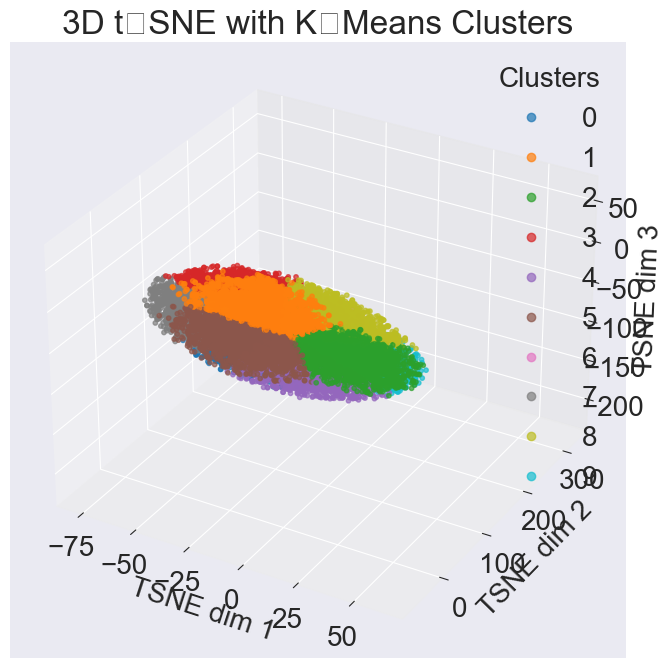

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    word_tsne_3d[:, 0],
    word_tsne_3d[:, 1],
    word_tsne_3d[:, 2],
    c=labels_3d,
    s=10,             # marker size
    cmap='tab10',     # up to 10 clusters—switch cmap if k>10
    alpha=0.7
)

ax.set_title('3D t‑SNE with K‑Means Clusters')
ax.set_xlabel('TSNE dim 1')
ax.set_ylabel('TSNE dim 2')
ax.set_zlabel('TSNE dim 3')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [10]:
# k=10
k = 1000

# 2. Fit K‑means on the 3D coordinates
kmeans_3d = KMeans(n_clusters=k, random_state=0, n_init=10)
labels_3d = kmeans_3d.fit_predict(word_tsne_3d)

# 3. Group word indices by cluster
from collections import defaultdict
clusters_3d = defaultdict(list)
for idx, cl in enumerate(labels_3d):
    clusters_3d[cl].append(idx)

# 4. Print a sample of words in each cluster
for cl in range(k):
    words = [ind2word[i] for i in clusters_3d[cl]]
    print(f"Cluster {cl} ({len(words)} words): {', '.join(words[:20])} …")

Cluster 0 (24 words): time, instruct, mail, stuck, vents, task, visit, stashed, bringing, march, proudly, keen, ventures, february, lice, toothpaste, tounge, florals, darkens, houston …
Cluster 1 (18 words): 40b, graduated, jagged, owns, raw', sie, relative, weathered, 18lbs, gluey, kors, fiery, ignite, sycamore, survivor, a370, cadillac, policeman …
Cluster 2 (22 words): engagement, tweens, mountaineering, eliminated, drinker, athletes, overstuffed, 18mm, wishing, southwest, lent, tripod, nalgas, modestys, dat, adoableness, thurs, isle, stacy, quo …
Cluster 3 (19 words): lifespan, faith, circle, humour, ice, volume, station, span, swallowed, lips, embellishment, 8x10, shebang, principle, layout, neapolitan, sandwiches, hankie, cheekbones …
Cluster 4 (24 words): solid, smooth, real, finished, polished, canvas, shiny, stacked, shinny, matte, chips, glittery, plate, blingy, hypoallergenic, patent, suede, chrome, cottony, antiqued …
Cluster 5 (26 words): foolishness, picks, responded, for

c:\Users\AlexL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


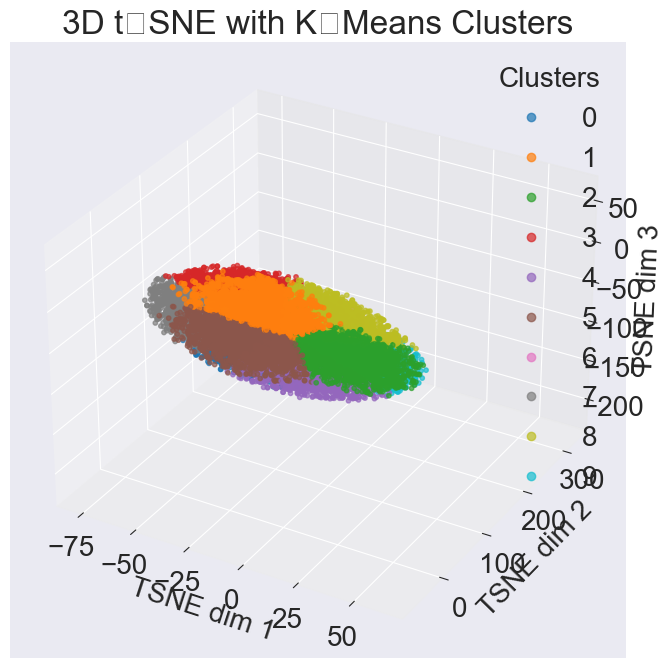

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    word_tsne_3d[:, 0],
    word_tsne_3d[:, 1],
    word_tsne_3d[:, 2],
    c=labels_3d,
    s=10,             # marker size
    cmap='tab10',     # up to 10 clusters—switch cmap if k>10
    alpha=0.7
)

ax.set_title('3D t‑SNE with K‑Means Clusters')
ax.set_xlabel('TSNE dim 1')
ax.set_ylabel('TSNE dim 2')
ax.set_zlabel('TSNE dim 3')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [22]:
# 1) Enable an interactive Matplotlib backend
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401
from ipywidgets import interact, IntSlider

# — assume these are already in your session —
# word_tsne_3d: np.ndarray, shape (vocab_size, 3)
# labels_3d:    np.ndarray, shape (vocab_size,)
# ind2word:     dict mapping int → str
# k:            number of clusters

def plot_cluster_3d(cluster_id):
    # mask for the chosen cluster
    mask = (labels_3d == cluster_id)
    all_pts = word_tsne_3d
    cluster_pts = word_tsne_3d[mask]

    # bounding‐box + padding
    mins = cluster_pts.min(axis=0)
    maxs = cluster_pts.max(axis=0)
    pad  = (maxs - mins) * 0.05

    fig = plt.figure(figsize=(6,6))
    ax  = fig.add_subplot(111, projection='3d')

    # all points in light gray
    ax.scatter(all_pts[:,0], all_pts[:,1], all_pts[:,2],
               c='lightgray', s=2, alpha=0.5)
    # cluster in blue
    ax.scatter(cluster_pts[:,0], cluster_pts[:,1], cluster_pts[:,2],
               c='C0', s=10)

    # zooming limits
    ax.set_xlim(mins[0]-pad[0], maxs[0]+pad[0])
    ax.set_ylim(mins[1]-pad[1], maxs[1]+pad[1])
    ax.set_zlim(mins[2]-pad[2], maxs[2]+pad[2])

    ax.set_title(f'Cluster {cluster_id} of {k}')
    ax.set_xlabel('t‑SNE dim 1')
    ax.set_ylabel('t‑SNE dim 2')
    ax.set_zlabel('t‑SNE dim 3')
    plt.show()

    # print some words in this cluster
    words = [ind2word[i] for i in np.where(mask)[0]]
    print(f"Cluster {cluster_id} ({len(words)} words):", ", ".join(words[:30]), "…")

# interactive slider from 0 to k‑1
interact(plot_cluster_3d,
         cluster_id=IntSlider(min=0, max=k-1, step=1, value=0,
                              description='Cluster ID'));


ModuleNotFoundError: No module named 'ipympl'